# Machine Learning for Medicine
# The Expectation-Maximisation Algorithm
> * **Merrouche Aymen**

# Introduction

In [2]:
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import pandas as pd
import numpy as np
import random

# Data

## Import medical data :

### Breast cancer data set : 
> Describes wheather a breast mas is malignant or not based cell nuclei characteristics.

In [3]:
# import the data
data_path = './data/'
breast_cancer = pd.read_table(data_path+"BreastDiagnostic.txt",sep=",",header=None)

In [4]:
breast_cancer_X = breast_cancer.drop([0, 1], axis=1)
breast_cancer_X

,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
breast_cancer_y = breast_cancer[1]
breast_cancer_y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: 1, Length: 569, dtype: object

### Mice data set :
> Describes different classes of mice based on different variables (expression levels of 77 proteins/protein modifications, genotype, behavior and treatment)

In [6]:
# import the data
data_path = './data/'
mice_dataset = pd.read_excel(data_path+"Data_Cortex_Nuclear.xls")
# fill nans
mice_dataset = mice_dataset.interpolate(limit_direction = 'both', limit = None)
# delete id (non informative) and class (for clustering)
mice_dataset_X = mice_dataset.drop(["MouseID", "class"], axis=1)

In [7]:
# get non numerical features
num_cols = mice_dataset_X._get_numeric_data().columns
non_num_cols = set(mice_dataset_X.columns) - set(num_cols)

In [8]:
from sklearn import preprocessing
# encode non numerical features (all methods compute distances)
for non_numerical_feature in non_num_cols:
    labelEncoder = preprocessing.LabelEncoder()
    labelEncoder.fit(mice_dataset_X[non_numerical_feature])
    mice_dataset_X[non_numerical_feature] = labelEncoder.transform(mice_dataset_X[non_numerical_feature])
mice_dataset_X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,0,0,0
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,0,0,0
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,0,0,0
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,0,0,0
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,1,1,1
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,1,1,1
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,1,1,1
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,1,1,1


In [9]:
mice_dataset_y = mice_dataset["class"]
mice_dataset_y

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

In [10]:
medical_data = {"breast" : (breast_cancer_X, breast_cancer_y), "mice" : (mice_dataset_X, mice_dataset_y)}

# Generate a 1D toy dataset :

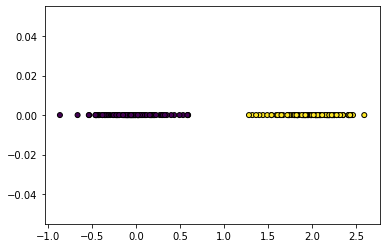

In [11]:
# first Gaussian Cluster (class 0)
mu1, sigma1 = 0, 0.3 # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 100)
y1 = np.repeat(0, 100)

# second Gaussian Cluster (class 1)
mu2, sigma2 = 2, 0.3 # mean and standard deviation
s2 = np.random.normal(mu2, sigma2, 100)
y2 = np.repeat(1, 100)

# the corresponding dataset
mu = [mu1, mu2]
sigma = [sigma1, sigma2]
data = np.concatenate([s1,s2])
y = np.concatenate([y1,y2])

data_1D = {"gaussian_mixture" : (data, y), "parameters" : (mu, sigma)}
plt.scatter(data, np.zeros_like(data), marker='o', c=y,s=25, edgecolor='k')

## Generate 2D toy datasets :

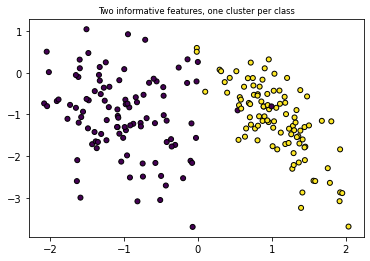

In [12]:
# First simulated data set
plt.title("Two informative features, one cluster per class", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state = 5)

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

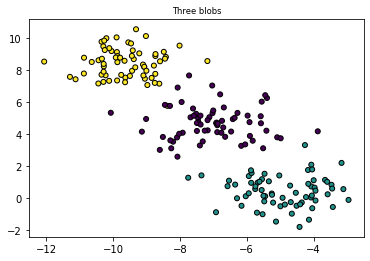

In [13]:
# Second simulated data set
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3, random_state = 12)

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

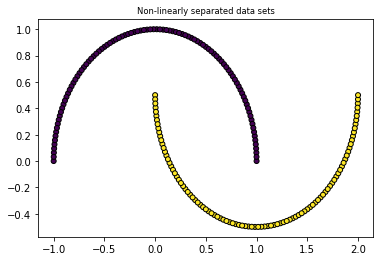

In [14]:
# Third simulated data set
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)

plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

In [15]:
data_2D = {"classes" : (X1, Y1), "blobs" : (X2, Y2), "moons" : (X3, Y3)}

# 1 - EM for One Dimensional Data :

> In this section we test the EM for gaussian mixtures algorithm for one dimentional data.

## Implementation :

In [16]:
# Implementation of EM algorithm for guassian mixtures for one dimentional data
def pr_single_comp(mu, sigma, x):
    """
    N(mu, sigma) pdf for each x_i in x (for each m in mu and s in sigma) | theoretically : P(n|k)
    """
    prob = []
    for i in range(0, x.shape[0]):
        prob.append(np.exp(-0.5*((x[i,]-mu)/sigma)**2)/sigma + 1e-13)
    return prob 
def pr_single_normalized(mu,sigma, x):
    """
    Normalized N(mu, sigma) pdf for each x_i in x (for each m in mu and s in sigma) | theoretically : P(k|n)
    """
    # theoretically : P(n|k)
    unnorm_prob = pr_single_comp(mu, sigma, x)
    # theoritically : p(x_i) (probability of each point in the mixture model)
    normalization = np.sum(pr_single_comp(mu, sigma, x), axis=1) 
    prob = []
    # theoretically : P(k | n) (here there is an implicit supposition that the population fractions p(k) are equal)
    for i in range(0, len(unnorm_prob)):
        prob.append(unnorm_prob[:][i]/normalization[i])
    return prob
def update_mu(x,mu,sigma):
    """
    Update mu according to the EM algorithm
    """
    prob = pr_single_normalized(mu,sigma,x)
    hat_mu = [0, 0]
    for i in range(0, len(prob)) :
        hat_mu = hat_mu + prob[i][:]*x[i,]
    hat_mu = hat_mu/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_mu
def update_sigma(x,mu,sigma):
    """
    Update sigma according to the EM algorithm
    """
    prob = pr_single_normalized(mu,sigma,x)
    hat_sigma = [0, 0]
    for i in range(0, len(prob)):
        hat_sigma = hat_sigma + prob[i][:]*(x[i,] - mu)**2
    hat_sigma = hat_sigma/np.sum(pr_single_normalized(mu, sigma, x), axis=0)
    return hat_sigma

def predict(x, mu, sigma):
    """
    Classes of each x in X given the mu and sigma yielded by the EM algorithm
    """
    prob = pr_single_normalized(mu,sigma,x)
    return np.argmax(prob, axis = 1)

## Training and Displaying results :

Result :
	 final mu :  [0.9593521 0.9795697]  vs true_mu : [0, 2]
	 final sigma :  [1.13715378 1.1370628 ]  vs true_sigma : [0.3, 0.3]


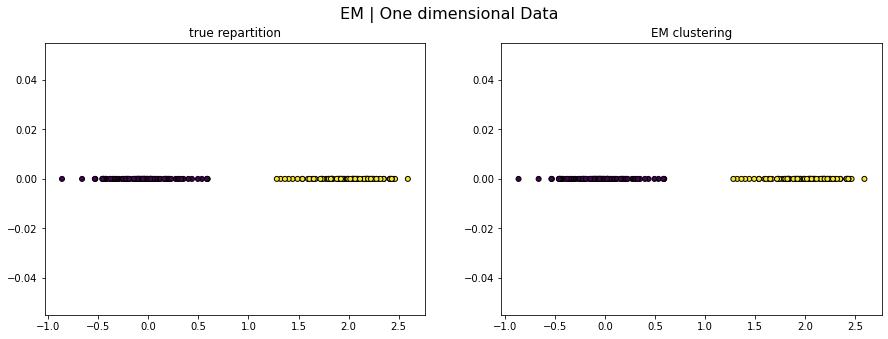

In [17]:
NbIter = 10 # number of iterations
verbose = False # verbosity
X, y = data_1D["gaussian_mixture"] # data set

# initialisation of mu and sigma
mu_old = [random.uniform(-2, 2), random.uniform(0, 4)]
sigma_old = [0.3, 0.3]

# Learning procedure (optimization)
for iter in range(1, NbIter):
    hat_mu = update_mu(data,mu_old,sigma_old)
    hat_sigma = update_sigma(data,mu_old,sigma_old)
    if verbose:
        print('iter', iter)
        print('updated mu = ',hat_mu)
        print('updated sigma = ',hat_sigma)
    mu_old = hat_mu
    sigma_old = hat_sigma + 1e-13

# result and prediction
mu_pred = hat_mu
sigma_pred = hat_sigma + 1e-13
print('Result :')
print('\t final mu : ',mu_pred," vs true_mu :", data_1D["parameters"][0])
print('\t final sigma : ',sigma_pred," vs true_sigma :", data_1D["parameters"][1])
# predict the cluster of each datapoint
y_pred = predict(X, mu_old, sigma_old)

# plot the result
plt.figure(figsize=(15, 5))
plt.suptitle("EM | One dimensional Data", fontsize=16)
ax = plt.subplot(1, 2, 1)
ax.set_title("true repartition")
plt.scatter(X, np.zeros_like(X), marker='o', c=y,s=25, edgecolor='k')
ax = plt.subplot(1, 2, 2)
ax.set_title("EM clustering")
plt.scatter(X, np.zeros_like(X), marker='o', c=y_pred,s=25, edgecolor='k')

> What we can say is that EM can yield different results including surprising ones (false clustering when all the hypotheses of the algorithm are satisfied), this is due the random initialisation of the means.
> * The resulting means and covariances are not always consistent with the way the data was initialised. In the cases where the algorithm clusters correctly the data, we get approximately equal covariances and means close to the ground truth means.

# 2 - EM for multidimentional data :

## Implementation :

> The below implementation follows the EM algorithm for gaussian mixtures:
> * The means are initialised with randomly drawn datapoints (from the dataset), the covariances are all initialised with identity matrices and the population fractions in $k$ are initialised with $\frac{1}{k}$ (where $k$ is the number of components of the gaussian mixture model).

In [18]:
def initialize(X, k, seed = 2):
    """
    Yields an intialisation for means, covariances and fractions (p(k)) for the EM algorithm
    """
    # to ensure reporducibility
    np.random.seed(seed)
    # initial population fraction in k (weights/prior)
    fractions = np.full(k, 1/k)
    # initial means (take random points in the data)
    means = X[np.random.choice(np.arange(0, X.shape[0]), k)]
    # initial covariances : identity matrices
    covs = np.array([np.eye(X.shape[1]) for i in range(k)])
    return means, covs, fractions

def guassian_pdf(X, mean, cov):
    """
    Multivariate gaussian pdf
    """
    # juste the multivariate gaussian pdf
    invcov = np.linalg.inv(cov + 1e-6*np.eye(cov.shape[0]))
    r = np.exp(-0.5*np.diag((X-mean).dot(invcov.dot((X-mean).T))))
    r *= np.sqrt(np.linalg.det(invcov/(2*np.pi)))
    return r

def pr_comp(means, covs, fractions, X):
    """
    p(k)*N(mu, sigma) for each x_i in x (for each m in mu and s in sigma) | theoretically : p(n,k)
    returns array of shape k * N
    """
    # apply directly the formula
    prob = np.array([frac*guassian_pdf(X, mean, cov) for mean, cov, frac in zip(means, covs, fractions)])
    return prob 

def pr_normalized(means, covs, fractions, X):
    """
    Normalized p(k)*N(mu, sigma) pdf for each x_i in x (for each m in mu and s in sigma) | theoretically : P(k|n)
    return array of shape k * N
    """
    # theoretically : P(n, k)
    unnorm_prob = pr_comp(means, covs, fractions, X)
    # theoritically : p(x_i) (probability of each point in the mixture model)
    normalization = np.sum(unnorm_prob, axis=0)
    # theoretically : P(k | n) just apply the bayes formula
    prob = unnorm_prob/normalization
    return prob

def update_fractions(prob):
    """
    update p(k) according to the EM algorithm i.e. 1/N sum_n(p(k|n))
    returns array of shape k
    """
    return prob.mean(axis = 1)

def update_means(prob, X):
    """
    update mu according to the EM algorithm i.e. sum_n(p(k|n)*x_n) / sum_n(p(k|n))
    returns array of shape k * d (where d is the dimension of the problem i.e. X.shape[1])
    """
    return (prob @ X)/np.expand_dims(prob.sum(axis = 1), axis=1)

def update_covs(prob, means, X):
    """
    update sigma according to the EM algorithm i.e. sum_n(p(k|n)*<(x_n - mu_k),(x_n - mu_k)>) / sum_n(p(k | n))
    returns array of shape k * (d*d) (where d is the dimension of the problem i.e. X.shape[1])
    """
    return [(X-m).T.dot(np.diag(p).dot(X-m)) / p.sum() for p, m in zip(prob, means)]

def learn(X, k, nb_iter = 100):
    """
    training/fitting of the EM algorithm on X with nb_compnents set to k
    returns the final means, covs and fractions
    """
    
    # initialisation
    means, covs, fractions = initialize(X, k)
    for i in range(nb_iter):
        # Expectation
        prob = pr_normalized(means, covs, fractions, X)
        
        # Maximisation : Update means, covs and fractions
        # 1: fractions
        fractions = update_fractions(prob)
        # 2: means 
        means = update_means(prob, X)
        # 3: covs
        covs = update_covs(prob, means, X)
    return means, covs, fractions
def predict(X, means, covs, fractions):
    """
    predicts the class of each x_i given the means, covs and fractions yielded by the EM algorithm for gaussian mixtures
    returns array of shape N
    """
    prob = pr_normalized(means, covs, fractions, X)
    return prob.argmax(axis = 0)
def EM(X, k, nb_iter = 100):
    """
    Complete EM algorithm (fit + predict)
    returns array of shape N
    """
    means, covs, fractions = learn(X, k, nb_iter)
    return predict(X, means, covs, fractions)

In [19]:
# Metrics to evaluate the clustering resutls
metrics_list = {"Homogeneity" : metrics.homogeneity_score, "Completeness": metrics.completeness_score,\
           "V-measure" : metrics.v_measure_score, "Adjusted Rand-Index" : metrics.adjusted_rand_score,\
           "Silhouette Coefficient" : metrics.silhouette_score}

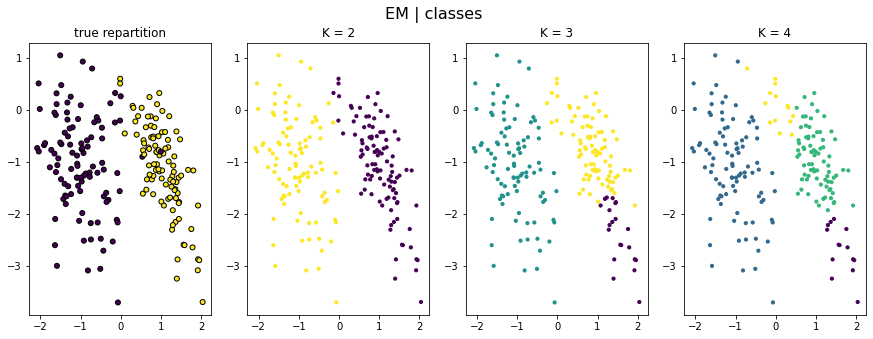

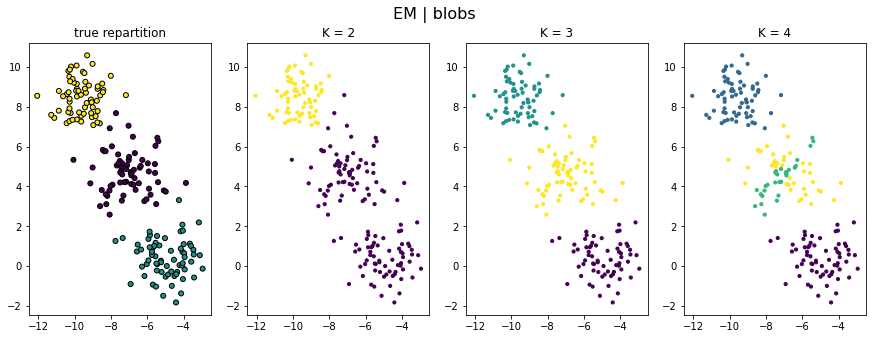

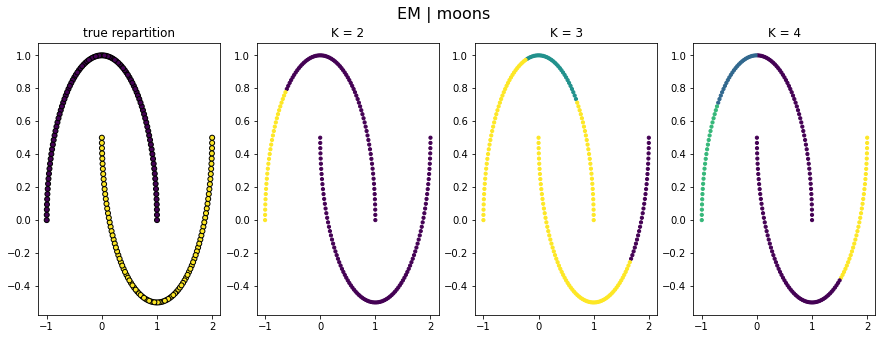

In [20]:
# Test EM on 2D toy datasets
EM_scores = {}
for configuration in data_2D:
    EM_scores[configuration] = {}
    X, Y = data_2D[configuration]

    plt.figure(figsize=(15, 5))
    plt.suptitle("EM | "+str(configuration), fontsize=16)
    
    # plot the true repartition
    ax = plt.subplot(1, 4, 1)
    ax.set_title("true repartition")
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,s=25, edgecolor='k')
    for it, k in enumerate([2, 3, 4]):
        y_pred = EM(X, k)
        ax = plt.subplot(1, 4, it+2)
        ax.set_title("K = "+str(k))
        plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)
        
        # scoring
        EM_scores[configuration][k] = {}
        for metric_name in metrics_list:
            if metric_name == 'Silhouette Coefficient' :
                # Silhouette Coefficient requires more than 1 cluster labels
                if np.all(y_pred == y_pred[0]) :
                    EM_scores[configuration][k][metric_name] = None
                else:
                    EM_scores[configuration][k][metric_name] = metrics_list[metric_name](X, y_pred)
            else :
                EM_scores[configuration][k][metric_name] = metrics_list[metric_name](Y, y_pred)

> One of the difficulties of clustering, which is also the case for the EM algorithm (unlike other algorithms like DBSCAN) is that we do not know the number of classes $k$, since labels $Y$ are not observed. We display the results of EM clustering on the three toy datasets for different values of k.
* The same problem of EM for 1D data is encountered here : EM can produce different results, however in this case it is rare that EM misclassifies the classes dataset and the moons dataset.  We can say that initialising the means with random points in the dataset is a better alternative to raw random initialisation. We get the following results :
    * For the classes dataset, EM yields a similar result to the ground truth when k is set to the real number of classes.
    * For the blobs dataset, EM performs good for k=3.
    * For the moons dataset, EM performs poorly even when k is set to the real number of classes. This is because EM assumes that the data is drawn from a gaussian mixture model i.e. each cluster follows a gaussian distribution (for the blobs dataset and the moons dataset the cluster were somewhat spherical and the hypothesis was ok). This example doesn't meet the algorithm's assumptions.
* The results are similar to the ones observed with the k-means algorithm, this is because this algorithm shares similarities with the k-means algorithm. EM for gaussian mixtures is also called **soft-kmeans**. Further on the similarity between k-means and EM for gaussian mixtures :
    * k-means assigns each point to a cluster $C_j$ and then updates the cluster's centroid $\hat{\mu}_j$ by computing an avergae of the cluster's members (hard assignment).
    * soft k-means estimates the probability of each point to belong to each cluster (using the gaussian mixture assumption) and then updates the centroid using a weighted average of the whole dataset (soft assignment).

### Now let's evaluate the clustering reuslts with the different metrics introduced in the last practical session :

In [21]:
import pandas as pd
# just to display the different scores for the EM alorithm

# kmeans
classes_df_em = pd.DataFrame.from_dict(EM_scores["classes"])
blobs_df_em = pd.DataFrame.from_dict(EM_scores["blobs"])
moons_df_em = pd.DataFrame.from_dict(EM_scores["moons"])
em_df = pd.concat([classes_df_em, blobs_df_em, moons_df_em], keys=["classes", "blobs", "moons"])
display(em_df)

2         3         4
classes Homogeneity             0.855667  0.826147  0.863900
        Completeness            0.855975  0.599698  0.547008
        V-measure               0.855821  0.694940  0.669867
        Adjusted Rand-Index     0.902008  0.716247  0.723512
        Silhouette Coefficient  0.477585  0.419314  0.324764
blobs   Homogeneity             0.529824  0.911831  0.917100
        Completeness            0.928515  0.911831  0.758808
        V-measure               0.674671  0.911831  0.830478
        Adjusted Rand-Index     0.529095  0.940680  0.821011
        Silhouette Coefficient  0.542965  0.607871  0.447397
moons   Homogeneity             0.162824  0.290406  0.423941
        Completeness            0.272653  0.250842  0.259862
        V-measure               0.203889  0.269178  0.322216
        Adjusted Rand-Index     0.081812  0.081111  0.126137
        Silhouette Coefficient  0.352107  0.131216  0.326700

> The results of the different metrics are in line with what we observed earlier. Where EM performs well (classes dataset and blobs dataset for the real value of k) the metrics have the largest values. For the classes dataset, due to the presence of an overlapping area in the data, the clustering is imperfect, as confirmed by the homogeneity, Completeness and V-measure ($\approx 0.85$), we get better results than k-means. For the moons dataset, it performs very poorly across all metrics.

# 3 - EM from SK-learn :

> One the problems that we encountered earlier is that the real nummber of clusters is unkown. We have seen in the last practical sessions that the performance of a clustering with respect to the above mentionned metrics doesn't necessarily reflect a good choice for k. Here we explore another alternative, we slect the k which minimises the BIC score, the bellow scheme does this.

In [22]:
from sklearn import mixture

In [23]:
def get_bestGMM_bic(X, max_k = 5):
    """
    Returns the GMM for X that maximises number of clusters according to the BIC score (and the type of covariance parmeter to use)
    """
    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, max_k)
    n_compnents_opt = 1
    cv_type_opt = ""
    # String describing the type of covariance parameters to use.
    cv_types = ['spherical', 'tied', 'diag', 'full']
    bic_results = {}
    for cv_type in cv_types:
        bic_results[cv_type] = []
        # iterate over values of k (number of components in the gaussian mixture)
        for n_components in n_components_range:# Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            bic_results[cv_type].append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
                n_compnents_opt = n_components
                cv_type_opt = cv_type 
    y_predicted = best_gmm.predict(X)
    return y_predicted, n_compnents_opt, cv_type, bic_results

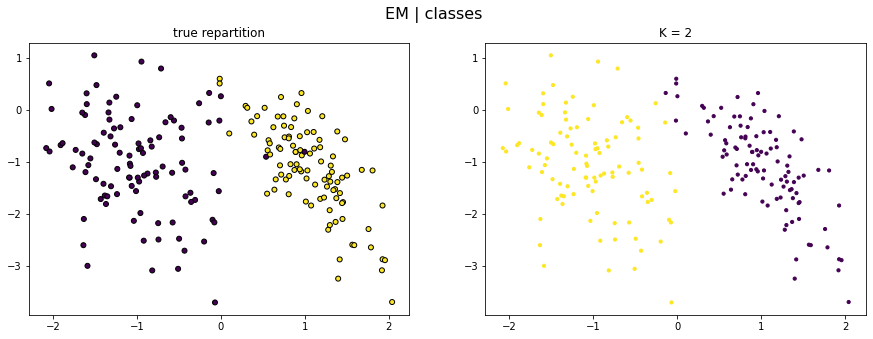

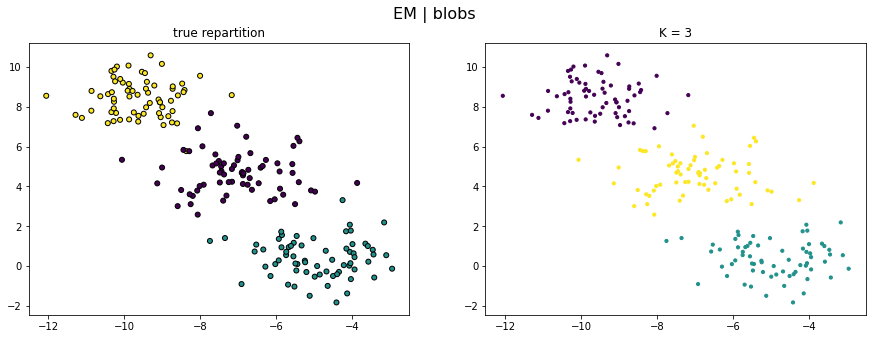

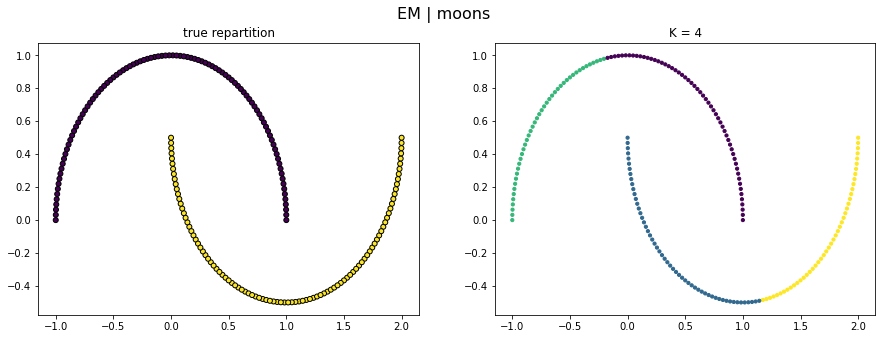

In [24]:
# Test sk learn EM on 2D toy datasets
EM_bestBIC_scores = {}
for configuration in data_2D:
    EM_bestBIC_scores[configuration] = {}
    X, Y = data_2D[configuration]

    plt.figure(figsize=(15, 5))
    plt.suptitle("EM | "+str(configuration), fontsize=16)
    
    # plot the true repartition
    ax = plt.subplot(1, 2, 1)
    ax.set_title("true repartition")
    plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y,s=25, edgecolor='k')
    
    # Get the GMM that maximises BIC score
    y_pred, k, _, _ = get_bestGMM_bic(X)
    
    # plot results vs ground truth
    ax = plt.subplot(1, 2, 2)
    ax.set_title("K = "+str(k))
    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

    # scoring
    EM_bestBIC_scores[configuration][k] = {}
    for metric_name in metrics_list:
        if metric_name == 'Silhouette Coefficient' :
            # Silhouette Coefficient requires more than 1 cluster labels
            if np.all(y_pred == y_pred[0]) :
                EM_bestBIC_scores[configuration][k][metric_name] = None
            else:
                EM_bestBIC_scores[configuration][k][metric_name] = metrics_list[metric_name](X, y_pred)
        else :
            EM_bestBIC_scores[configuration][k][metric_name] = metrics_list[metric_name](Y, y_pred)

> The BIC score succesfully selects k for the classes dataset and the blobs dataset but fails for the moons dataset. 
* We get similar results to the from-scracth implemented EM for gaussian mixtures algorithm (successful on the blobs dataset and on the classes dataset but fails for the moons datset for the same reason)

**Moreover let's compare the scores with respect to the different metrics tested above :**

In [25]:
import pandas as pd
# just to display the scores for the em clustering methods

# em
classes_df_em_bic = pd.DataFrame.from_dict(EM_bestBIC_scores["classes"])
blobs_df_em_bic = pd.DataFrame.from_dict(EM_bestBIC_scores["blobs"])
moons_df_em_bic = pd.DataFrame.from_dict(EM_bestBIC_scores["moons"])
em_df_bic = pd.concat([classes_df_em_bic, blobs_df_em_bic, moons_df_em_bic], keys=["classes", "blobs", "moons"])
display(em_df_bic)

2         3         4
classes Adjusted Rand-Index     0.902008       NaN       NaN
        Completeness            0.855975       NaN       NaN
        Homogeneity             0.855667       NaN       NaN
        Silhouette Coefficient  0.477585       NaN       NaN
        V-measure               0.855821       NaN       NaN
blobs   Adjusted Rand-Index          NaN  0.940680       NaN
        Completeness                 NaN  0.911831       NaN
        Homogeneity                  NaN  0.911831       NaN
        Silhouette Coefficient       NaN  0.607871       NaN
        V-measure                    NaN  0.911831       NaN
moons   Adjusted Rand-Index          NaN       NaN  0.502364
        Completeness                 NaN       NaN  0.502215
        Homogeneity                  NaN       NaN  1.000000
        Silhouette Coefficient       NaN       NaN  0.475372
        V-measure                    NaN       NaN  0.668632

> We get very similar results as the from-scratch implemented EM for gaussian mixture algorithm.

# 5 - Application on medical data
> In this section we apply the former algorithm (EM with nb_compenents that maximises the BIC score) on the two medicat datasets (high dimensional) described above.

In [26]:
# Test EM on 2D toy datasets
EM_bestBIC_scores_medical = {}
for configuration in medical_data:
    EM_bestBIC_scores_medical[configuration] = {}
    X, Y = medical_data[configuration]
    
    # Get the GMM that maximises BIC score
    y_pred, k, cv_type, bic_results  = get_bestGMM_bic(X, 16)

    # scoring
    EM_bestBIC_scores_medical[configuration][k] = {}
    for metric_name in metrics_list:
        if metric_name == 'Silhouette Coefficient' :
            # Silhouette Coefficient requires more than 1 cluster labels
            if np.all(y_pred == y_pred[0]) :
                EM_bestBIC_scores_medical[configuration][k][metric_name] = None
            else:
                EM_bestBIC_scores_medical[configuration][k][metric_name] = metrics_list[metric_name](X, y_pred)
        else :
            EM_bestBIC_scores_medical[configuration][k][metric_name] = metrics_list[metric_name](Y, y_pred)
            
# data frame of scores
breast_df_emBIC_medical = pd.DataFrame.from_dict(EM_bestBIC_scores_medical["breast"])
mice_df_emBIC = pd.DataFrame.from_dict(EM_bestBIC_scores_medical["mice"])
emBIC_df_medcial = pd.concat([breast_df_emBIC_medical, mice_df_emBIC], \
                               keys=["breast", "mice"])
display(emBIC_df_medcial)

2         15
breast Adjusted Rand-Index     0.811632       NaN
       Completeness            0.709218       NaN
       Homogeneity             0.703059       NaN
       Silhouette Coefficient  0.531517       NaN
       V-measure               0.706125       NaN
mice   Adjusted Rand-Index          NaN  0.454549
       Completeness                 NaN  0.609008
       Homogeneity                  NaN  0.756410
       Silhouette Coefficient       NaN  0.117343
       V-measure                    NaN  0.674753

In [27]:
for configuration in medical_data:
    print("number of classes in the ",configuration," datset : ",len(np.unique(medical_data[configuration][1])))

number of classes in the  breast  datset :  2
number of classes in the  mice  datset :  8


> * The BIC score maximisation scheme selects the correst value of $k = 2$ for the breast cancer dataset. And we get satisfacotory results with respect to the different metrics, EM for gaussain mixtures performs way better than k-means, Spectral Clustering and Hirerachical clustering on this dataset.
* The BIC score for the mice datset fails at finding the real value of $k$ (12 instead of 8, however we can say that it is close), EM for gaussian mixtures performs poorly on this dataset according to the different metrics.

# 6 - On the performance of EM for gaussian mixtures (soft k-means) :

* We have seen that EM performs good when its assumptions are satisfied (the data is drawn from a gaussian mixture model) i.e. when each cluster follows a gaussian distribution, which is often the case when dealing with real data, even when the data is high dimentional (ex the breast cancer dataset).
* EM for gaussian mixture performs badly when the clusters are not gaussian, as seen for the moons dataset.
* Two caveats when using soft k-means are : first selecting the number of components of the gaussian mixture (BIC score helps but is not always satisfactory as seen with moons dataset and the mice dataset). And second, the variability of the results, indeed EM for gaussian mixture can produce different results for different initialisation including very unexpected ones.
* EM for gaussian mixtures can be used where k-means is used, however soft k-means has some advantages since it uses the mahalanobis distance (induced by the gaussian mixture assumption we keep track of the covariance) we have some notion on the cluster's geometry, hence it can handle oblong clusters.